In [99]:
import glob
import pandas as pd
import numpy as np

In [66]:
import re
import os
import sys

In [67]:
logList=glob.glob('logs/DAQ_logs/lc*mar*')

In [64]:
df=pd.read_csv('logs/Positioning.csv')

In [65]:
df.Time=pd.to_datetime(df.Time)
df.set_index('Time',inplace=True)

In [68]:
x=re.compile('.*_(\d\d)mar_(\d*).csv')

In [70]:
timestamps=[]
for l in logList:
    g=x.match(l).groups()
    t=f'03-{g[0]}-22 {g[1][:2]}:{g[1][2:4]}:{g[1][4:6]}'
    timestamps.append(t)


In [71]:
len(timestamps)

7518

In [72]:
len(logList)

7518

In [233]:
df_Files=pd.DataFrame({'fileName':logList,'Time':pd.to_datetime(timestamps)})

In [234]:
df_Files.set_index('Time',inplace=True)
df_Files.sort_index(inplace=True)

In [235]:
df_Files['fType']=np.where(df_Files.fileName.str.contains('emulator'),'fName_Emulator',
                          np.where(df_Files.fileName.str.contains('ASIC'),'fName_ASIC','fName_Input'))

In [236]:
df_Files=df_Files.reset_index().pivot(index='Time',columns='fType',values='fileName')


In [237]:
df_Files=df_Files.merge(df,how='outer',left_index=True,right_index=True)
df_Files.sort_index(inplace=True)
df_Files.columns=['fName_ASIC', 'fName_Emulator', 'fName_Input','RelPosition','MotionTable']
df_Files.RelPosition=df_Files.RelPosition.ffill().astype(int)
df_Files.MotionTable=df_Files.MotionTable.ffill().astype(int)

df_Files.dropna(inplace=True)


In [238]:
df_Files

,fName_ASIC,fName_Emulator,fName_Input,RelPosition,MotionTable
Time,,,,,
2022-03-11 17:38:56,logs/DAQ_logs/lc-ASIC_11mar_173856.csv,logs/DAQ_logs/lc-emulator_11mar_173856.csv,logs/DAQ_logs/lc-input_11mar_173856.csv,25,269
2022-03-11 17:39:26,logs/DAQ_logs/lc-ASIC_oot_11mar_173926.csv,logs/DAQ_logs/lc-emulator_oot_11mar_173926.csv,logs/DAQ_logs/lc-input_oot_11mar_173926.csv,25,269
2022-03-11 17:39:56,logs/DAQ_logs/lc-ASIC_11mar_173956.csv,logs/DAQ_logs/lc-emulator_11mar_173956.csv,logs/DAQ_logs/lc-input_11mar_173956.csv,25,269
2022-03-11 17:40:26,logs/DAQ_logs/lc-ASIC_oot_11mar_174026.csv,logs/DAQ_logs/lc-emulator_oot_11mar_174026.csv,logs/DAQ_logs/lc-input_oot_11mar_174026.csv,25,269
2022-03-11 17:40:57,logs/DAQ_logs/lc-ASIC_11mar_174057.csv,logs/DAQ_logs/lc-emulator_11mar_174057.csv,logs/DAQ_logs/lc-input_11mar_174057.csv,25,269
...,...,...,...,...,...
2022-03-17 17:03:56,logs/DAQ_logs/lc-ASIC_tsalgo_randdata_17mar_17...,logs/DAQ_logs/lc-emulator_tsalgo_randdata_17ma...,logs/DAQ_logs/lc-input_tsalgo_randdata_17mar_1...,25,269
2022-03-17 17:04:27,logs/DAQ_logs/lc-ASIC_tsalgo_randdata_oot_17ma...,logs/DAQ_logs/lc-emulator_tsalgo_randdata_oot_...,logs/DAQ_logs/lc-input_tsalgo_randdata_oot_17m...,25,269
2022-03-17 17:04:57,logs/DAQ_logs/lc-ASIC_tsalgo_randdata_17mar_17...,logs/DAQ_logs/lc-emulator_tsalgo_randdata_17ma...,logs/DAQ_logs/lc-input_tsalgo_randdata_17mar_1...,25,269


In [239]:
monitoringLogs=glob.glob('logs/Monitoring_logs/*')

In [240]:
x=re.compile('(.*)\sINFO\s\s\sError counter (\d*)')
_timeStamps=[]
_errcounts=[]
_file=[]
for _f in monitoringLogs[:]:
    with open(_f) as _logFile:
        for l in _logFile:
            if x.match(l):
                vals=x.match(l).groups()
                if vals[1]=='0':
                    continue
                t=pd.to_datetime(vals[0])
                e=int(vals[1])
                _timeStamps.append(t)
                _errcounts.append(e)
                _file.append(_f)

In [241]:
len(_timeStamps)

2503

In [242]:
df_errCount=pd.DataFrame({'Time':_timeStamps,'Errors':_errcounts,'logFile':_file})
df_errCount.set_index('Time',inplace=True)
df_errCount.sort_index(inplace=True)

In [243]:
df_Files

,fName_ASIC,fName_Emulator,fName_Input,RelPosition,MotionTable
Time,,,,,
2022-03-11 17:38:56,logs/DAQ_logs/lc-ASIC_11mar_173856.csv,logs/DAQ_logs/lc-emulator_11mar_173856.csv,logs/DAQ_logs/lc-input_11mar_173856.csv,25,269
2022-03-11 17:39:26,logs/DAQ_logs/lc-ASIC_oot_11mar_173926.csv,logs/DAQ_logs/lc-emulator_oot_11mar_173926.csv,logs/DAQ_logs/lc-input_oot_11mar_173926.csv,25,269
2022-03-11 17:39:56,logs/DAQ_logs/lc-ASIC_11mar_173956.csv,logs/DAQ_logs/lc-emulator_11mar_173956.csv,logs/DAQ_logs/lc-input_11mar_173956.csv,25,269
2022-03-11 17:40:26,logs/DAQ_logs/lc-ASIC_oot_11mar_174026.csv,logs/DAQ_logs/lc-emulator_oot_11mar_174026.csv,logs/DAQ_logs/lc-input_oot_11mar_174026.csv,25,269
2022-03-11 17:40:57,logs/DAQ_logs/lc-ASIC_11mar_174057.csv,logs/DAQ_logs/lc-emulator_11mar_174057.csv,logs/DAQ_logs/lc-input_11mar_174057.csv,25,269
...,...,...,...,...,...
2022-03-17 17:03:56,logs/DAQ_logs/lc-ASIC_tsalgo_randdata_17mar_17...,logs/DAQ_logs/lc-emulator_tsalgo_randdata_17ma...,logs/DAQ_logs/lc-input_tsalgo_randdata_17mar_1...,25,269
2022-03-17 17:04:27,logs/DAQ_logs/lc-ASIC_tsalgo_randdata_oot_17ma...,logs/DAQ_logs/lc-emulator_tsalgo_randdata_oot_...,logs/DAQ_logs/lc-input_tsalgo_randdata_oot_17m...,25,269
2022-03-17 17:04:57,logs/DAQ_logs/lc-ASIC_tsalgo_randdata_17mar_17...,logs/DAQ_logs/lc-emulator_tsalgo_randdata_17ma...,logs/DAQ_logs/lc-input_tsalgo_randdata_17mar_1...,25,269


In [263]:
x=pd.merge_asof(df_Files.reset_index(),
                df_errCount.reset_index(),
                on='Time',
                direction='nearest',
                tolerance=pd.Timedelta("15s"))

<AxesSubplot:xlabel='Time'>

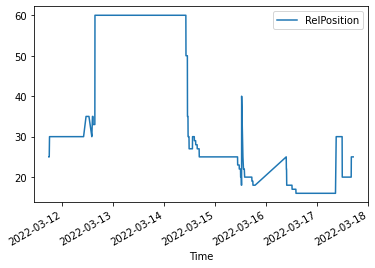

In [266]:
x.plot('Time','RelPosition')

In [278]:
x.Errors=x.Errors.fillna(0).astype(int)
x.logFile=x.logFile.ffill()

In [282]:
x.to_csv('logs/ErrorInfo.csv',index=False)